# Visualize samples for NGC 4047 in galactocentric radius and angle.

In [1]:
import matplotlib.pyplot as plt
import edge_pydb
from edge_pydb import EdgeTable
from edge_pydb.conversion import gc_polr
import numpy as np

## List the available tables

In [2]:
# Package location, where the _config.json file lives
print(edge_pydb.__path__)

['/Users/tonywong/Library/Python/3.6/lib/python/site-packages/edge_pydb']


In [3]:
# Get a listing of all files
EdgeTable('list')

Choose from the following files to read:
cospec_smo7.csv
edgealma_hispectra.csv
edge_hispectra.csv
NGC4047.pipe3d.hdf5
edge.pipe3d.hdf5
edge.cocube_smo7.hdf5
NGC4047.cocube_smo7.hdf5
edge_bbpars_smo7.csv
edge_rfpars.csv
edge_hiflux.csv
edge_bbpars_natv.csv
edge_coflux_natv.csv
edge_coobs_de20.csv
edge_coobs_d20.csv
edge_coobs_e20.csv
edge_coflux_e20.csv
edge_coobs_de10.csv
edge_coflux_smo7.csv
edge_coflux_smo6.csv
edge_wise.csv
edge_nsa.csv
edge_leda_old.csv
edge_ned.csv
edge_rdist.csv
edge_leda.csv
edge_califa.csv
NGC4047.comom_smo7.hdf5
edge.comom_smo7.hdf5
rprof_de20_smo.csv
rprof_smo7_smo.csv
bb_smo7_fixvd_dilmsk_freepa.csv
bb_smo5_fixvd_bbmsk_freepa.csv
bb_smo7_fixvd_dilmsk.csv
bb_natv_fitvd_dilmsk.csv
bb_natv_fixvd_dilmsk_freepa.csv
bb_natv_fitvd_bbmsk_freepa.csv
bb_smo7_fitvd_dilmsk.csv
bb_natv_fixvd_dilmsk.csv
bb_smo7_fixvd_bbmsk_freepa.csv
bb_smo5_fitvd_bbmsk.csv
bb_natv_fitvd_dilmsk_freepa.csv
bb_smo7_fitvd_dilmsk_freepa.csv
bb_smo5_fixvd_bbmsk.csv
bb_smo5_fixvd_dilmsk.csv
bb

<EdgeTable length=0>
<No columns>

## Read the observational values

In [4]:
# Here we forget to specify the path for an HDF5 file so it gives us a list of options
cotab = EdgeTable('NGC4047.comom_smo7.hdf5')

Columns in NGC4047.comom_smo7.hdf5 :
 ['dil', 'dil.__table_column_meta__', 'smo', 'smo.__table_column_meta__']


In [5]:
# Image data (mom0 image)
cotab = EdgeTable('NGC4047.comom_smo7.hdf5', path='smo')
cotab

Name,ix,iy,ra_off,dec_off,rad_arc,azi_ang,emom0max,mom0,emom0
,,,deg,deg,arcsec,deg,K km / s,K km / s,K km / s
bytes10,int32,int32,float32,float32,float32,float32,float32,float32,float32
NGC4047,2,2,0.032773,-0.021671,126.027,45.545,nan,nan,nan
NGC4047,2,5,0.032773,-0.020838,122.911,44.372,nan,nan,nan
NGC4047,2,8,0.032774,-0.020005,119.849,43.140,nan,nan,nan
NGC4047,2,11,0.032774,-0.019171,116.846,41.843,nan,nan,nan
NGC4047,2,14,0.032775,-0.018338,113.905,40.479,nan,nan,nan
NGC4047,2,17,0.032775,-0.017505,111.032,39.043,nan,nan,nan
NGC4047,2,20,0.032776,-0.016671,108.233,37.532,nan,nan,nan
NGC4047,2,23,0.032776,-0.015838,105.513,35.942,nan,nan,nan


In [6]:
# For calculating radius we need CARMA reference position
ctrpos = EdgeTable('edge_coflux_smo7.csv', cols=['Name', 'coRactr_smo7', 'coDectr_smo7'])
cotab.join(ctrpos)

# Optical radius, PA, Inc from LEDA
leda  = EdgeTable('edge_leda.csv', cols=['Name', 'ledaD25', 'ledaPA', 'ledaIncl'])
cotab.join(leda)

# PA, Inc from Becca's table
rftab  = EdgeTable('edge_rfpars.csv', cols=['Name', 'rfPA', 'rfInc'])
cotab.join(rftab)

cotab

Name,ix,iy,ra_off,dec_off,rad_arc,azi_ang,emom0max,mom0,emom0,coRactr_smo7,coDectr_smo7,ledaD25,ledaPA,ledaIncl,rfPA,rfInc
,,,deg,deg,arcsec,deg,K km / s,K km / s,K km / s,deg,deg,arcmin,deg,deg,,
str13,int32,int32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64
NGC4047,110,14,-0.012606,-0.018334,95.800,102.275,nan,nan,nan,180.7113,48.6362,1.53,99.87,42.03,104.0,42.1
NGC4047,110,20,-0.012606,-0.016667,88.184,103.896,nan,nan,nan,180.7113,48.6362,1.53,99.87,42.03,104.0,42.1
NGC4047,107,155,-0.011354,0.020833,101.854,-110.974,nan,nan,nan,180.7113,48.6362,1.53,99.87,42.03,104.0,42.1
NGC4047,110,23,-0.012606,-0.015834,84.406,104.816,nan,nan,nan,180.7113,48.6362,1.53,99.87,42.03,104.0,42.1
NGC4047,110,29,-0.012607,-0.014167,76.924,106.926,nan,nan,nan,180.7113,48.6362,1.53,99.87,42.03,104.0,42.1
NGC4047,110,32,-0.012607,-0.013334,73.229,108.141,3.5926418,nan,nan,180.7113,48.6362,1.53,99.87,42.03,104.0,42.1
NGC4047,110,35,-0.012607,-0.012501,69.570,109.486,3.3098822,nan,nan,180.7113,48.6362,1.53,99.87,42.03,104.0,42.1
NGC4047,107,17,-0.011345,-0.017501,90.822,101.303,nan,nan,nan,180.7113,48.6362,1.53,99.87,42.03,104.0,42.1


## Re-calculate polar coordinates in galaxy plane.  Use the CARMA coordinates to turn the offsets into absolute positions, and also as the reference value for the galaxy center.  Use Becca's ringfit table for PA and INC.

In [7]:
rarc, azdeg = gc_polr(cotab['coRactr_smo7']+cotab['ra_off'], 
                  cotab['coDectr_smo7']+cotab['dec_off'], 
                  cotab['coRactr_smo7'], cotab['coDectr_smo7'],
                  cotab['rfPA'], cotab['rfInc'])

## Produce the dot plots

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


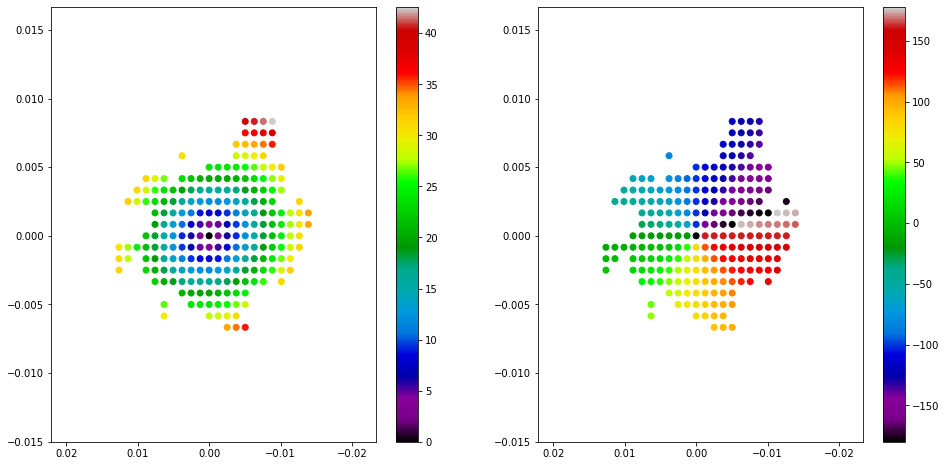

In [8]:
cmap = plt.cm.get_cmap('nipy_spectral')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
sel = (cotab['mom0']>0)
rplt = ax1.scatter(cotab['ra_off'][sel],cotab['dec_off'][sel],c=rarc[sel],cmap=cmap)
ax1.invert_xaxis()
plt.colorbar(rplt,ax=ax1)
tplt = ax2.scatter(cotab['ra_off'][sel],cotab['dec_off'][sel],c=azdeg[sel],cmap=cmap)
ax2.invert_xaxis()
plt.colorbar(tplt,ax=ax2)

## Compare with built-in calculation based on LEDA.

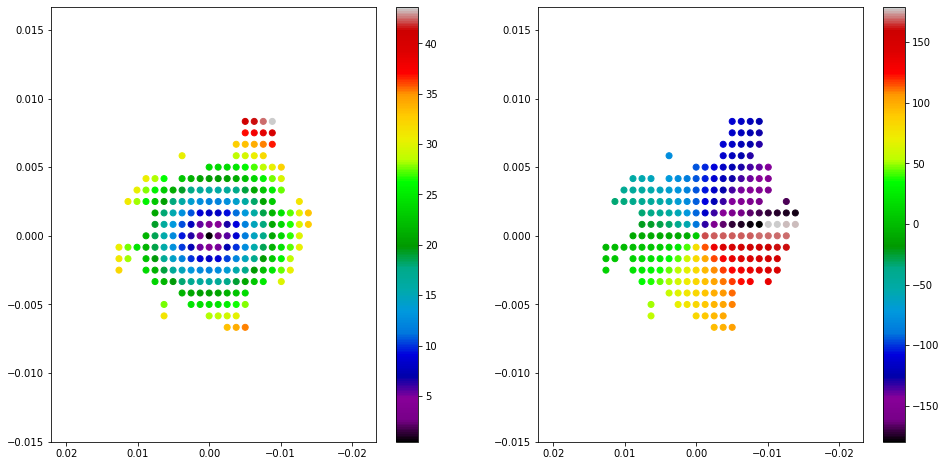

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
sel = (cotab['mom0']>0)
rplt = ax1.scatter(cotab['ra_off'][sel],cotab['dec_off'][sel],c=cotab['rad_arc'][sel],cmap=cmap)
ax1.invert_xaxis()
plt.colorbar(rplt,ax=ax1)
tplt = ax2.scatter(cotab['ra_off'][sel],cotab['dec_off'][sel],c=cotab['azi_ang'][sel],cmap=cmap)
ax2.invert_xaxis()
plt.colorbar(tplt,ax=ax2)

## Compare Becca's values with LEDA.

In [10]:
leda.join(rftab)
leda

Name,ledaD25,ledaPA,ledaIncl,rfPA,rfInc
,arcmin,deg,deg,,
str13,float64,float64,float64,float64,float64
ARP220,1.11,96.46,56.98,337.7,29.7
IC0480,1.75,167.29,90.0,167.9,76.6
IC0540,1.07,170.79,90.0,350.0,68.3
IC0944,1.53,106.54,67.58,105.7,75.0
IC1151,2.23,31.81,69.61,203.9,68.0
IC1199,1.19,158.0,74.75,339.3,64.5
IC1683,1.32,173.03,69.03,15.6,54.8
IC2247,1.82,149.14,90.0,328.5,77.7


Text(0, 0.5, 'RINGFIT cos(inc)')

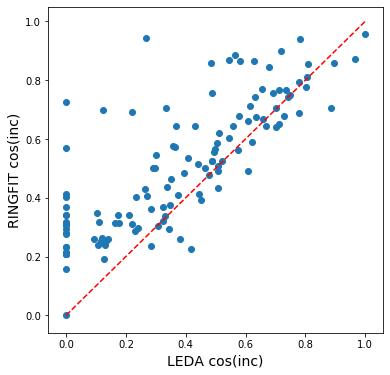

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(np.cos(np.radians(leda['ledaIncl'])),np.cos(np.radians(leda['rfInc'])))
ax.plot([0,1],[0,1],'r--')
plt.xlabel('LEDA cos(inc)',fontsize=14)
plt.ylabel('RINGFIT cos(inc)',fontsize=14)

Text(0, 0.5, 'RINGFIT PA [deg]')

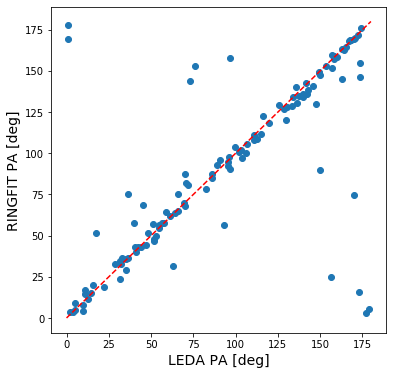

In [12]:
leda['rfPA'][leda['rfPA'] >= 180] -= 180
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(leda['ledaPA'],leda['rfPA'])
ax.plot([0,180],[0,180],'r--')
plt.xlabel('LEDA PA [deg]',fontsize=14)
plt.ylabel('RINGFIT PA [deg]',fontsize=14)